# Tarea 5
**ALUMNA : NICOLE ROMAN QUISPE (20206093)**


### Ejercicio 1: The diet problem

In [4]:
pip install  pulp


In [5]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pulp as pp
import pandas as pd


1. **Creamos las variables**

In [9]:
model = pp.LpProblem(name='Cantidad-suplemento', # just the name
                     sense=pp.LpMinimize) # type of problem

In [10]:
VV = pp.LpVariable(name="VegaVita",  # just the name
                    lowBound=0,  # ensure non-negativity
                    cat='Continuous') # here: you accept decimal values

HH = pp.LpVariable(name="HappyHealth",
                 lowBound=0,
                 cat='Continuous')



In [11]:
VV_precio=0.2
HH_precio=0.3
obj_func = VV_precio*VV + HH_precio*HH

2. La cantidad de suplementos

In [13]:
Nutrientes = ['Vitamina A', 'Calcio', 'Hierro', 'Niacina', 'Magnesio']
VegaV = [20, 500, 9, 2, 60]
HappyH = [30, 250, 2, 10, 90]
Necesidad_paciente = [60, 1000, 18, 20, 360]

Tabla = pd.DataFrame({
    'Nutrientes': Nutrientes,
    'VV (mg)': VegaV,
    'HH (mg)': HappyH,
    'Necesidad Paciente (mg)': Necesidad_paciente
})

In [14]:
Tabla

,Nutrientes,VV (mg),HH (mg),Necesidad Paciente (mg)
0,Vitamina A,20,30,60
1,Calcio,500,250,1000
2,Hierro,9,2,18
3,Niacina,2,10,20
4,Magnesio,60,90,360


Creación del modelo de optimización 

In [16]:
#Las condicionantes 

#C2= pp.LpConstraint(name='Oil Constraint',
 #                   e= 1*Oil, rhs=3000000,
  #                  sense=pp.LpConstraintGE) # 'rule' >= 3000000 (LpConstraintGE)

C1=pp.LpConstraint(name="VitaminaC", 
                    e=20 * VV + 30 * HH, rhs=60, 
                    sense=pp.LpConstraintGE) #>= 60
            
C2=pp.LpConstraint(name="Calcio", 
                    e=500*VV + 250*HH,rhs=1000, 
                    sense=pp.LpConstraintGE) #>= 1000

C3=pp.LpConstraint(name="Hierro", 
                    e=9*VV + 2*HH,rhs=18, 
                    sense=pp.LpConstraintGE, ) #>= 18

C4=pp.LpConstraint(name="Niacina", 
                    e=2*VV + 10*HH,rhs=20, 
                    sense=pp.LpConstraintGE, ) #>= 20

C5=pp.LpConstraint(name="Magnesio", 
                    e=60*VV + 90*HH,rhs=360, 
                    sense=pp.LpConstraintGE, ) #>= 360  

    # "pp.LpConstraintGE" es "Greater Than or Equal" o "mayor o igual que"
    #Otras opciones: "pp.LpConstraintEQ" para "Equal" o "igual a"
    #O "pp.LpConstraintLE" para "Less Than or Equal" o menor o igual que

In [17]:
#En primer lugar, se crea el modelo y se le agrega la función a ser optimizada. A continuación, se agregan las condicionantes


#agregamos cada condicionante
model += obj_func #agramos el objeto función
model += C1
model += C2
model += C3
model += C4
model += C5

In [18]:
solver_list = pp.listSolvers()
print(solver_list)

['GLPK_CMD', 'PYGLPK', 'CPLEX_CMD', 'CPLEX_PY', 'GUROBI', 'GUROBI_CMD', 'MOSEK', 'XPRESS', 'XPRESS', 'XPRESS_PY', 'PULP_CBC_CMD', 'COIN_CMD', 'COINMP_DLL', 'CHOCO_CMD', 'MIPCL_CMD', 'SCIP_CMD', 'FSCIP_CMD', 'SCIP_PY', 'HiGHS', 'HiGHS_CMD', 'COPT', 'COPT_DLL', 'COPT_CMD']


In [19]:
solverToUse = pp.COIN_CMD(msg=False)
model.solve();

#model.solve();

In [20]:
import pandas as pd

Results={"Model Status":pp.LpStatus[model.status]}
Results.update({"Optimal Solution":pp.value(model.objective)})
Results.update({v.name: v.varValue for v in model.variables()})
Results

{'Model Status': 'Optimal',
 'Optimal Solution': 1.2,
 'HappyHealth': 3.1304348,
 'VegaVita': 1.3043478}

In [21]:
pd.DataFrame.from_dict(Results,orient='index').T.set_index('Model Status').style.format('{:,}')

,Optimal Solution,HappyHealth,VegaVita
Model Status,,,
Optimal,1.2,3.1304348,1.3043478


## <span style="color:#FF0000">  Ejercicio: Elegir un país para un Programa de Maestría  </span>


- Únete a 3 o 4 personas de este curso (u otros amigos si es necesario).
- Si tienes los criterios: costo de vida, dificultad del idioma, posibilidades de conseguir un trabajo en ese país.
- Si tienes las alternativas: Brasil, España, Estados Unidos, Inglaterra, Francia.
- Crea un modelo AHP y obtén la clasificación.
- Puedes seguir este ejemplo. Si tienes una idea mejor, puedes usarla en su lugar.

In [23]:
!pip show ahp


Name: AHP
Version: 0.0.1
Summary: AHP in Python
Home-page: https://github.com/guofei9987/AHP
Author: Guo Fei
Author-email: guofei9987@foxmail.com
License: MIT
Location: C:\Users\USER\anaconda3\Lib\site-packages
Requires: numpy, pandas
Required-by: 


In [24]:
from ahp.ahp import AHP


In [25]:
import pandas as pd

pairwise_Costliving=pd.read_excel("5tables.xlsx",sheet_name='Costliving', index_col=0)
pairwise_Language=pd.read_excel("5tables.xlsx",sheet_name='Language', index_col=0)
pairwise_Job=pd.read_excel("5tables.xlsx",sheet_name='Job', index_col=0)
pairwise_criteria=pd.read_excel("5tables.xlsx",sheet_name='Criteria', index_col=0)

In [26]:
pairwise_criteria

,Cost of living,Language difficulty,Possibilities to get a job
Cost of living,1.000000,3,3.000000
Language difficulty,0.333333,1,0.333333
Possibilities to get a job,0.333333,3,1.000000


In [27]:
# follow the same order as the criteria
data = [pairwise_Costliving.values.tolist(),
        pairwise_Language.values.tolist(),
        pairwise_Job.values.tolist(),
        pairwise_criteria.values.tolist()]

In [28]:
#Time to fit the AHP model:

ahp = AHP()
ahp.fit(data)

In [29]:
Solution=pd.DataFrame(index=pairwise_Costliving.index)
Solution['Score']=ahp.classificate()
Solution['Ranking']=Solution.Score.rank(ascending=False)
Solution

,Score,Ranking
Brazil,0.060735,5.0
Spain,0.134003,4.0
USA,0.217910,2.0
England,0.377809,1.0
France,0.209543,3.0


 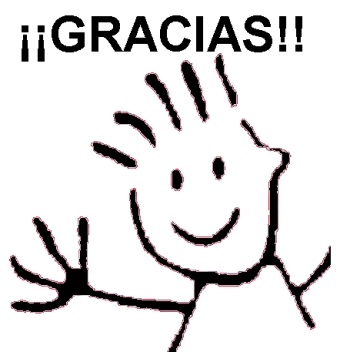
